In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./data/data.csv')

In [4]:
data

,id,Value
0,SAMPLE_00000,27.636770
1,SAMPLE_00001,27.250818
2,SAMPLE_00002,27.154348
3,SAMPLE_00003,NaN
4,SAMPLE_00004,NaN
...,...,...
62624,SAMPLE_62624,NaN
62625,SAMPLE_62625,NaN
62626,SAMPLE_62626,21.465771
62627,SAMPLE_62627,21.562141


In [5]:
data.isnull().sum()

id           0
Value    22493
dtype: int64

## 결측치 22493 / 62629 (약 36%)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62629 entries, 0 to 62628
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      62629 non-null  object 
 1   Value   40136 non-null  float64
dtypes: float64(1), object(1)
memory usage: 978.7+ KB


In [7]:
data.describe()

,Value
count,40136.000000
mean,23.725770
std,5.055014
min,6.886155
25%,21.080368
50%,24.260941
75%,27.057861
max,37.697052


Text(0, 0.5, 'Value')

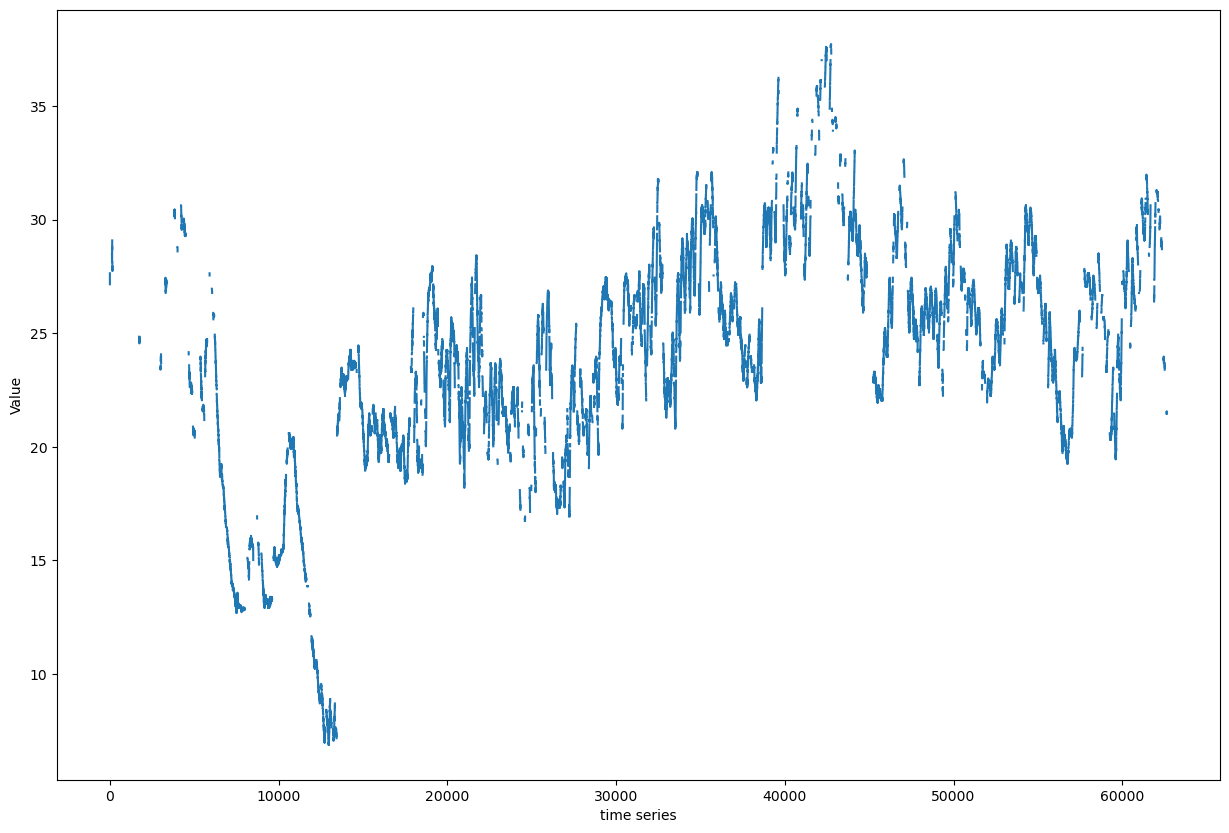

In [10]:
plt.figure(figsize=(15,10))
plt.plot(data['Value'])
plt.xlabel('time series')
plt.ylabel("Value")

In [12]:
data[data['Value'] == 0]

,id,Value


## 결측치를 0(zero)으로 보간 후 히스토그램으로 가시화

In [21]:
fill_zero = data.copy()

In [22]:
fill_zero['Value'].fillna(0, inplace=True)

In [23]:
fill_zero

,id,Value
0,SAMPLE_00000,27.636770
1,SAMPLE_00001,27.250818
2,SAMPLE_00002,27.154348
3,SAMPLE_00003,0.000000
4,SAMPLE_00004,0.000000
...,...,...
62624,SAMPLE_62624,0.000000
62625,SAMPLE_62625,0.000000
62626,SAMPLE_62626,21.465771
62627,SAMPLE_62627,21.562141


(array([22493.,   222.,   883.,  1903.,  2077.,  8924., 13423., 10238.,
         2043.,   423.]),
 array([ 0.       ,  3.7697052,  7.5394104, 11.3091156, 15.0788208,
        18.848526 , 22.6182312, 26.3879364, 30.1576416, 33.9273468,
        37.697052 ]),
 <BarContainer object of 10 artists>)

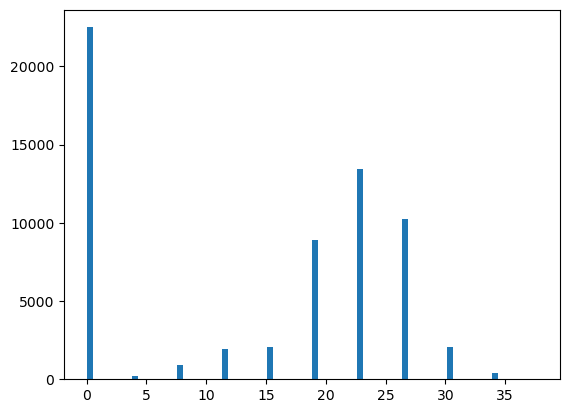

In [26]:
plt.hist(x=fill_zero['Value'], width=0.5)

Text(0, 0.5, 'Temperature')

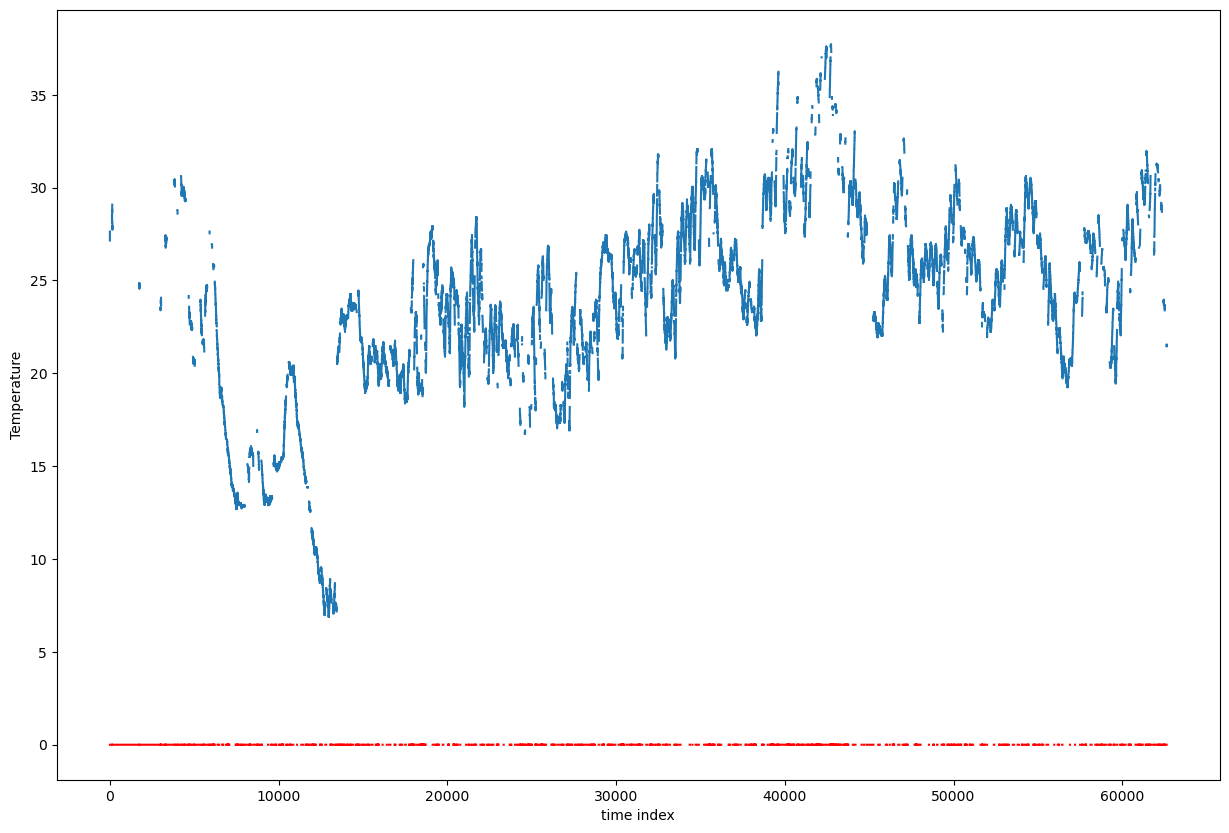

In [25]:
plt.figure(figsize=(15,10))
plt.plot(data['Value'], label='Original Data')
plt.plot(fill_zero['Value'].where(data['Value'].isnull()),color='red', label='Fill 0')
plt.xlabel('time index')
plt.ylabel("Temperature")